<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [1]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [2]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

<ipython-input-2-b3fdaf15785b>:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


#### Read the dataset in the csv file from the URL


In [3]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [4]:
boston_df=pd.read_csv(boston_url)

In [5]:
sns.set(style="whitegrid")

#### Add your code below following the instructions given in the course to complete the peer graded assignment


## Task 2: Generate Descriptive Statistuics and Visualization

### Boxplot for the "Median value of owner-occupied homes"

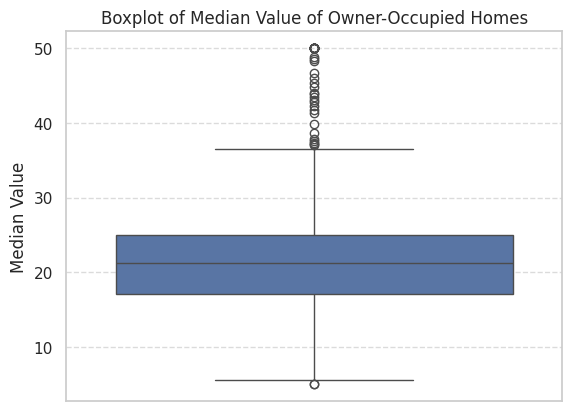

In [8]:
sns.boxplot(y=boston_df['MEDV'])
pyplot.title('Boxplot of Median Value of Owner-Occupied Homes')
pyplot.ylabel('Median Value')
pyplot.grid(axis="y", linestyle="--", alpha=0.7)
pyplot.show()

The boxplot titled "Boxplot of Median Value Owner-Occupied Homes" shows the distribution of median home values. Here's a summary of the data:

* The y-axis represents the median value of owner-occupied homes, ranging from 0 to 50.
* The lower whisker extends to less than 10, approximately around 8.
* The lower quartile (Q1) is around 18.
* The median (Q2) is at about 21.
* The upper quartile (Q3) is around 24.
* The upper whisker extends to almost 40.
* There are several outliers above the upper whisker, with values ranging from about just below 40 to 50.

This boxplot indicates that the majority of median home values fall between 18 and 24, with aa few higher outliers.

### Box plot for the Charles river variable

Create a dataframe with the count of 0s and 1s in the 'CHAS' column

In [9]:
chas_count = boston_df['CHAS'].value_counts().reset_index()
chas_count.columns = ['CHAS', 'count']

Bar plot for the Charles river variable based on the new dataframe

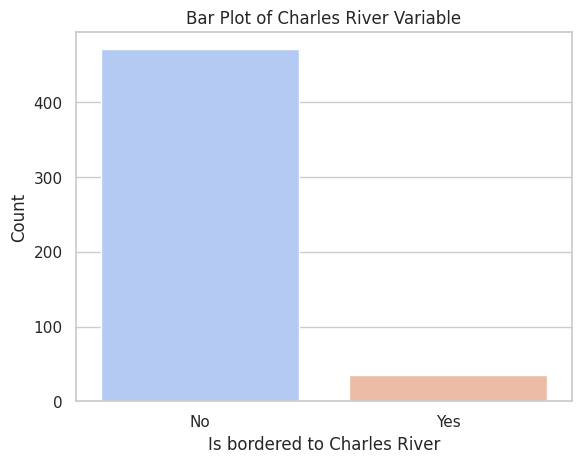

In [10]:
sns.barplot(x=chas_count['CHAS'], y=chas_count['count'], hue=chas_count['CHAS'], palette="coolwarm", legend=False)
pyplot.xticks([0,1],["No","Yes"])
pyplot.title('Bar Plot of Charles River Variable')
pyplot.xlabel('Is bordered to Charles River')
pyplot.ylabel('Count')
pyplot.show()

The histogram indicates that there are significantly more areas not bordered by the Charles River compared to those that are

### Boxplot for the MEDV variable vs the AGE variable

Discretize the AGE variable into three groups

In [13]:
boston_df['AGE_group'] = pd.cut(boston_df['AGE'], bins=[0, 35, 70, 100], labels=['35 years and younger', 'between 35 and 70 years', '70 years and older'])

Create the boxplot

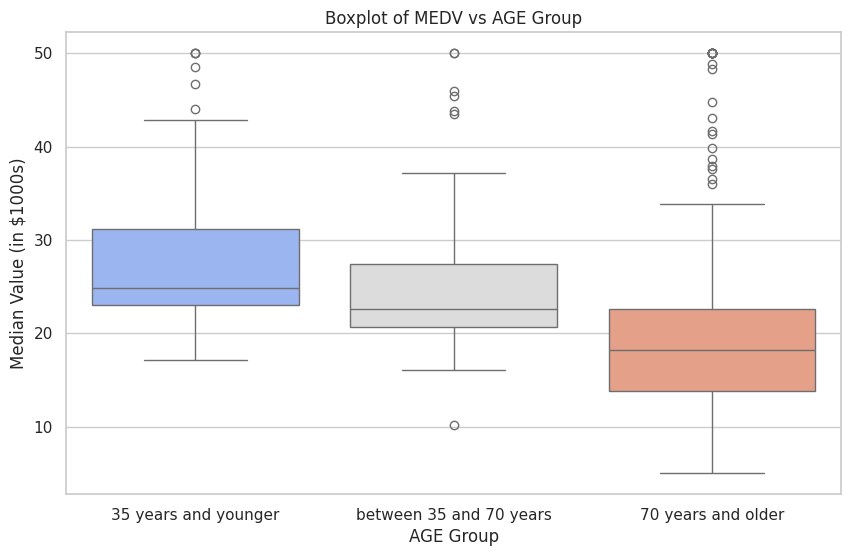

In [14]:
pyplot.figure(figsize=(10,6))
sns.boxplot(x=boston_df['AGE_group'], y=boston_df['MEDV'], hue=boston_df['AGE_group'], palette="coolwarm")
pyplot.title('Boxplot of MEDV vs AGE Group')
pyplot.xlabel('AGE Group')
pyplot.ylabel('Median Value (in $1000s)')
pyplot.show()

Interpretation of the Results

* Median Values: The median values of homes decreases slightly as the age of the homes increases. Homes that are 35 years and younger have the highest median value, while homes that are 70 years and older have the lowest median value.
* Interquartile Range (IQR): The IQR is widest for homes that are 70 years and older, indicating more variability in home values within this group. The IQR narrows for the other two groups, suggesting less variability in home values.
* Outliers: All three groups have outliers, but the oldest group (70 years and older) has the highest outliers, indicating that some newer homes have significantly higher values compared to the rest.
* Whiskers: The whiskers sho the range of home values within 1.5 times hte IQR from the quartiles. The oldest group has the longest whiskers, indicating a wider range of home values.

Overall, the boxplot suggests that newer homes tend to have higher median values and more variability in their values compared to older homes. The presence of outliers in all groups indicates that there are some homes with values significantly different from the majority in each age group.

### Scatter plot to show the relationship between NOX and INDUS

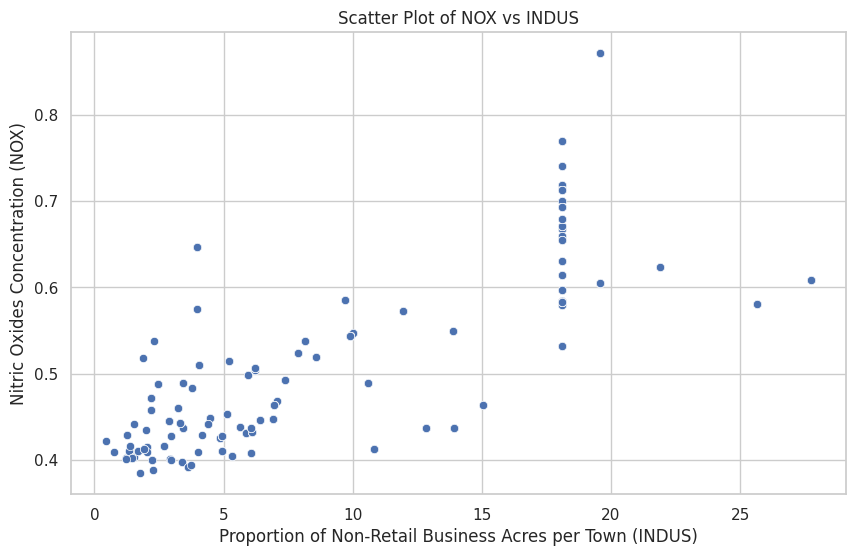

In [15]:
pyplot.figure(figsize=(10, 6))
sns.scatterplot(x=boston_df['INDUS'], y=boston_df['NOX'])
pyplot.title('Scatter Plot of NOX vs INDUS')
pyplot.xlabel('Proportion of Non-Retail Business Acres per Town (INDUS)')
pyplot.ylabel('Nitric Oxides Concentration (NOX)')
pyplot.show()

The distribution shows that the most common pupil-to-teacher ratio is around between 20 and 21, with the highest count in that range.

## Task 3: Use the appropriate test to answer the questions provided.

Set value for alpha = 0.05

In [16]:
alpha = 0.05

### 1. T-test: Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

State the hypothesis:

* $H\_0:$ There is no significant difference in median value of houses bounded by the Charles river or not.
* $H\_1:$ There is a significant difference in median values of houses bounded by the Charles river or not.

In [17]:
group_1 = boston_df[boston_df['CHAS'] == 1]['MEDV']
group_2 = boston_df[boston_df['CHAS'] == 0]['MEDV']

In [18]:
t_stat, p_value = scipy.stats.ttest_ind(group_1, group_2, equal_var=False)
print(f"T-test: t-statistics = {t_stat:.4f}, p_value={p_value:.4f}")

T-test: t-statistics = 3.1133, p_value=0.0036


In [19]:
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in mkedian value of houses bounded by the Charles river or not.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in median value of houses bounded by the Charles river or not")

Reject the null hypothesis: There is a significant difference in mkedian value of houses bounded by the Charles river or not.


### 2. ANOVA: Is there a difference in Median values of house (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

State the hypothesis:

* $H\_0:$ There is no difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE).
* $H\_1:$ There is a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE).

In [23]:
boston_df['AGE_group'] = pd.cut(boston_df['AGE'], bins=[0, 35, 70, 100], labels=['35 years and younger', 'between 35 and 70 years', '70 years and older'])

group_1 = boston_df[boston_df["AGE_group"] == "35 years and younger"]["MEDV"]
group_2 = boston_df[boston_df["AGE_group"] == "between 35 and 70 years"]["MEDV"]
group_3 = boston_df[boston_df["AGE_group"] == "70 years and older"]["MEDV"]

f_stat, p_value = scipy.stats.f_oneway(group_1, group_2, group_3)
print(f"ANOVA Test: f-statistics: {f_stat:.4f}, P-value; {p_value:.4f}")

ANOVA Test: f-statistics: 36.4076, P-value; 0.0000


In [24]:
if p_value < alpha:
    print("Reject the null hypthesis: There is a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE).")
else:
     print("Fail to reject the null hypthesis: There is no difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE).")

Reject the null hypthesis: There is a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE).


### 3. Pearson Correlation: Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town) (Pearson Correlation)

State the hypothesis:

* $H\_0:$ There is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town.
* $H\_1:$ There is a relationship between Nitric oxide concentrations and proportion of non-retail business acres per town.

In [25]:
correlation, p_value = scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])
print(f"Pearson Correlation: correlation coefficient = {correlation:.4f}, p-value = {p_value:.4f}")

Pearson Correlation: correlation coefficient = 0.7637, p-value = 0.0000


In [26]:
if p_value < alpha:
    print("Reject the null hypothesis: There is a relationship between Nitric oxide concentrations and proportion of non-retail business acres per town.")
else:
     print("Fail to reject the null hypothesis: There is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town.")

Reject the null hypothesis: There is a relationship between Nitric oxide concentrations and proportion of non-retail business acres per town.


### 4. Regression analysis: What is the impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

State the hypothesis:

* $H\_0:$ The slope of the regression line is equal to zeor (no impact).
* $H\_1:$ The slope of the regression line is not equal to zeor (there is an impact).

In [27]:
X = boston_df['DIS']
Y = boston_df['MEDV']
X = sm.add_constant(X)
regression_model = sm.OLS(Y, X).fit()
print(regression_model.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Sat, 01 Mar 2025   Prob (F-statistic):           1.21e-08
Time:                        18:08:30   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.0

In [29]:
p_value = regression_model.pvalues.iloc[1]
print(f"Regression analysis: p-value = {p_value:.4f}")
if p_value < alpha:
    print("Reject the null hypothesis: An additional weighted distance to the five Boston employment centres has an impact on the median value of owner occupied homes.")
else:
    print("Fail to reject the null hypothesis: An additional weighted distance to the five Boston employment centres has no impact on the median value of owner occupied homes.")

Regression analysis: p-value = 0.0000
Reject the null hypothesis: An additional weighted distance to the five Boston employment centres has an impact on the median value of owner occupied homes.
